In [1]:
import pandas as pd
import panel as pn
pn.extension('tabulator')

import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd


In [2]:
# cache data to improve dashboard performance
if 'data' not in pn.state.cache.keys():

    df = pd.read_excel('../data/raw/Volume Fruit Importing.xlsx')

    pn.state.cache['data'] = df.copy()

else: 

    df = pn.state.cache['data']
    
# Make DataFrame Pipeline Interactive
#idf = px.data.df()


In [11]:
# Define Panel widgets
#year_slider = pn.widgets.IntSlider(name='Year', start=2010, end=2021, step=1)
#year_slider

In [3]:
# Load the 'naturalearth_lowres' dataset from the URL
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\Roy\AppData\Local\Temp\ipykernel_652\1738600272.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [4]:
new_df = df[df['Country'] != 'Others']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 130
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    120 non-null    object 
 1   Year       120 non-null    int64  
 2   Volume     120 non-null    float64
 3   Latitude   120 non-null    int64  
 4   Longitude  120 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 5.6+ KB


In [5]:
# Merging the new_df with world data frame
merged_data = new_df.merge(world, left_on = 'Country', right_on = 'name')

,Country,Year,Volume,Latitude,Longitude,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,China,2010,427231.7,35861660,104195396,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
1,China,2011,461671.7,35861660,104195396,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
2,China,2012,433998.2,35861660,104195396,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
3,China,2013,293148.2,35861660,104195396,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
4,China,2014,276448.9,35861660,104195396,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."


In [7]:
# Create basic choropleth map
fig1 = px.choropleth(merged_data, locations='iso_a3', color='Volume', hover_name='Country',
                    projection='natural earth', animation_frame='Year',
                    title='Indonesian Exporters')

In [8]:
fig2 = px.scatter_geo(merged_data, locations="iso_a3", color="continent",
                     hover_name="Country", size="Volume",
                     animation_frame="Year",
                     projection="natural earth")


pn.extension('plotly')



FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [browser_info] BrowserInfo()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [1987601005200] Row
        [0] Column
            [0] Plotly(Figure)
    [1987600651472] Row
        [0] Column
            [0] Plotly(Figure)
    [1987569726480] Markdown(str)
    [1987569939536] Markdown(str)
    [1987570423056] JPG(str, sizing_mode='scale_both')
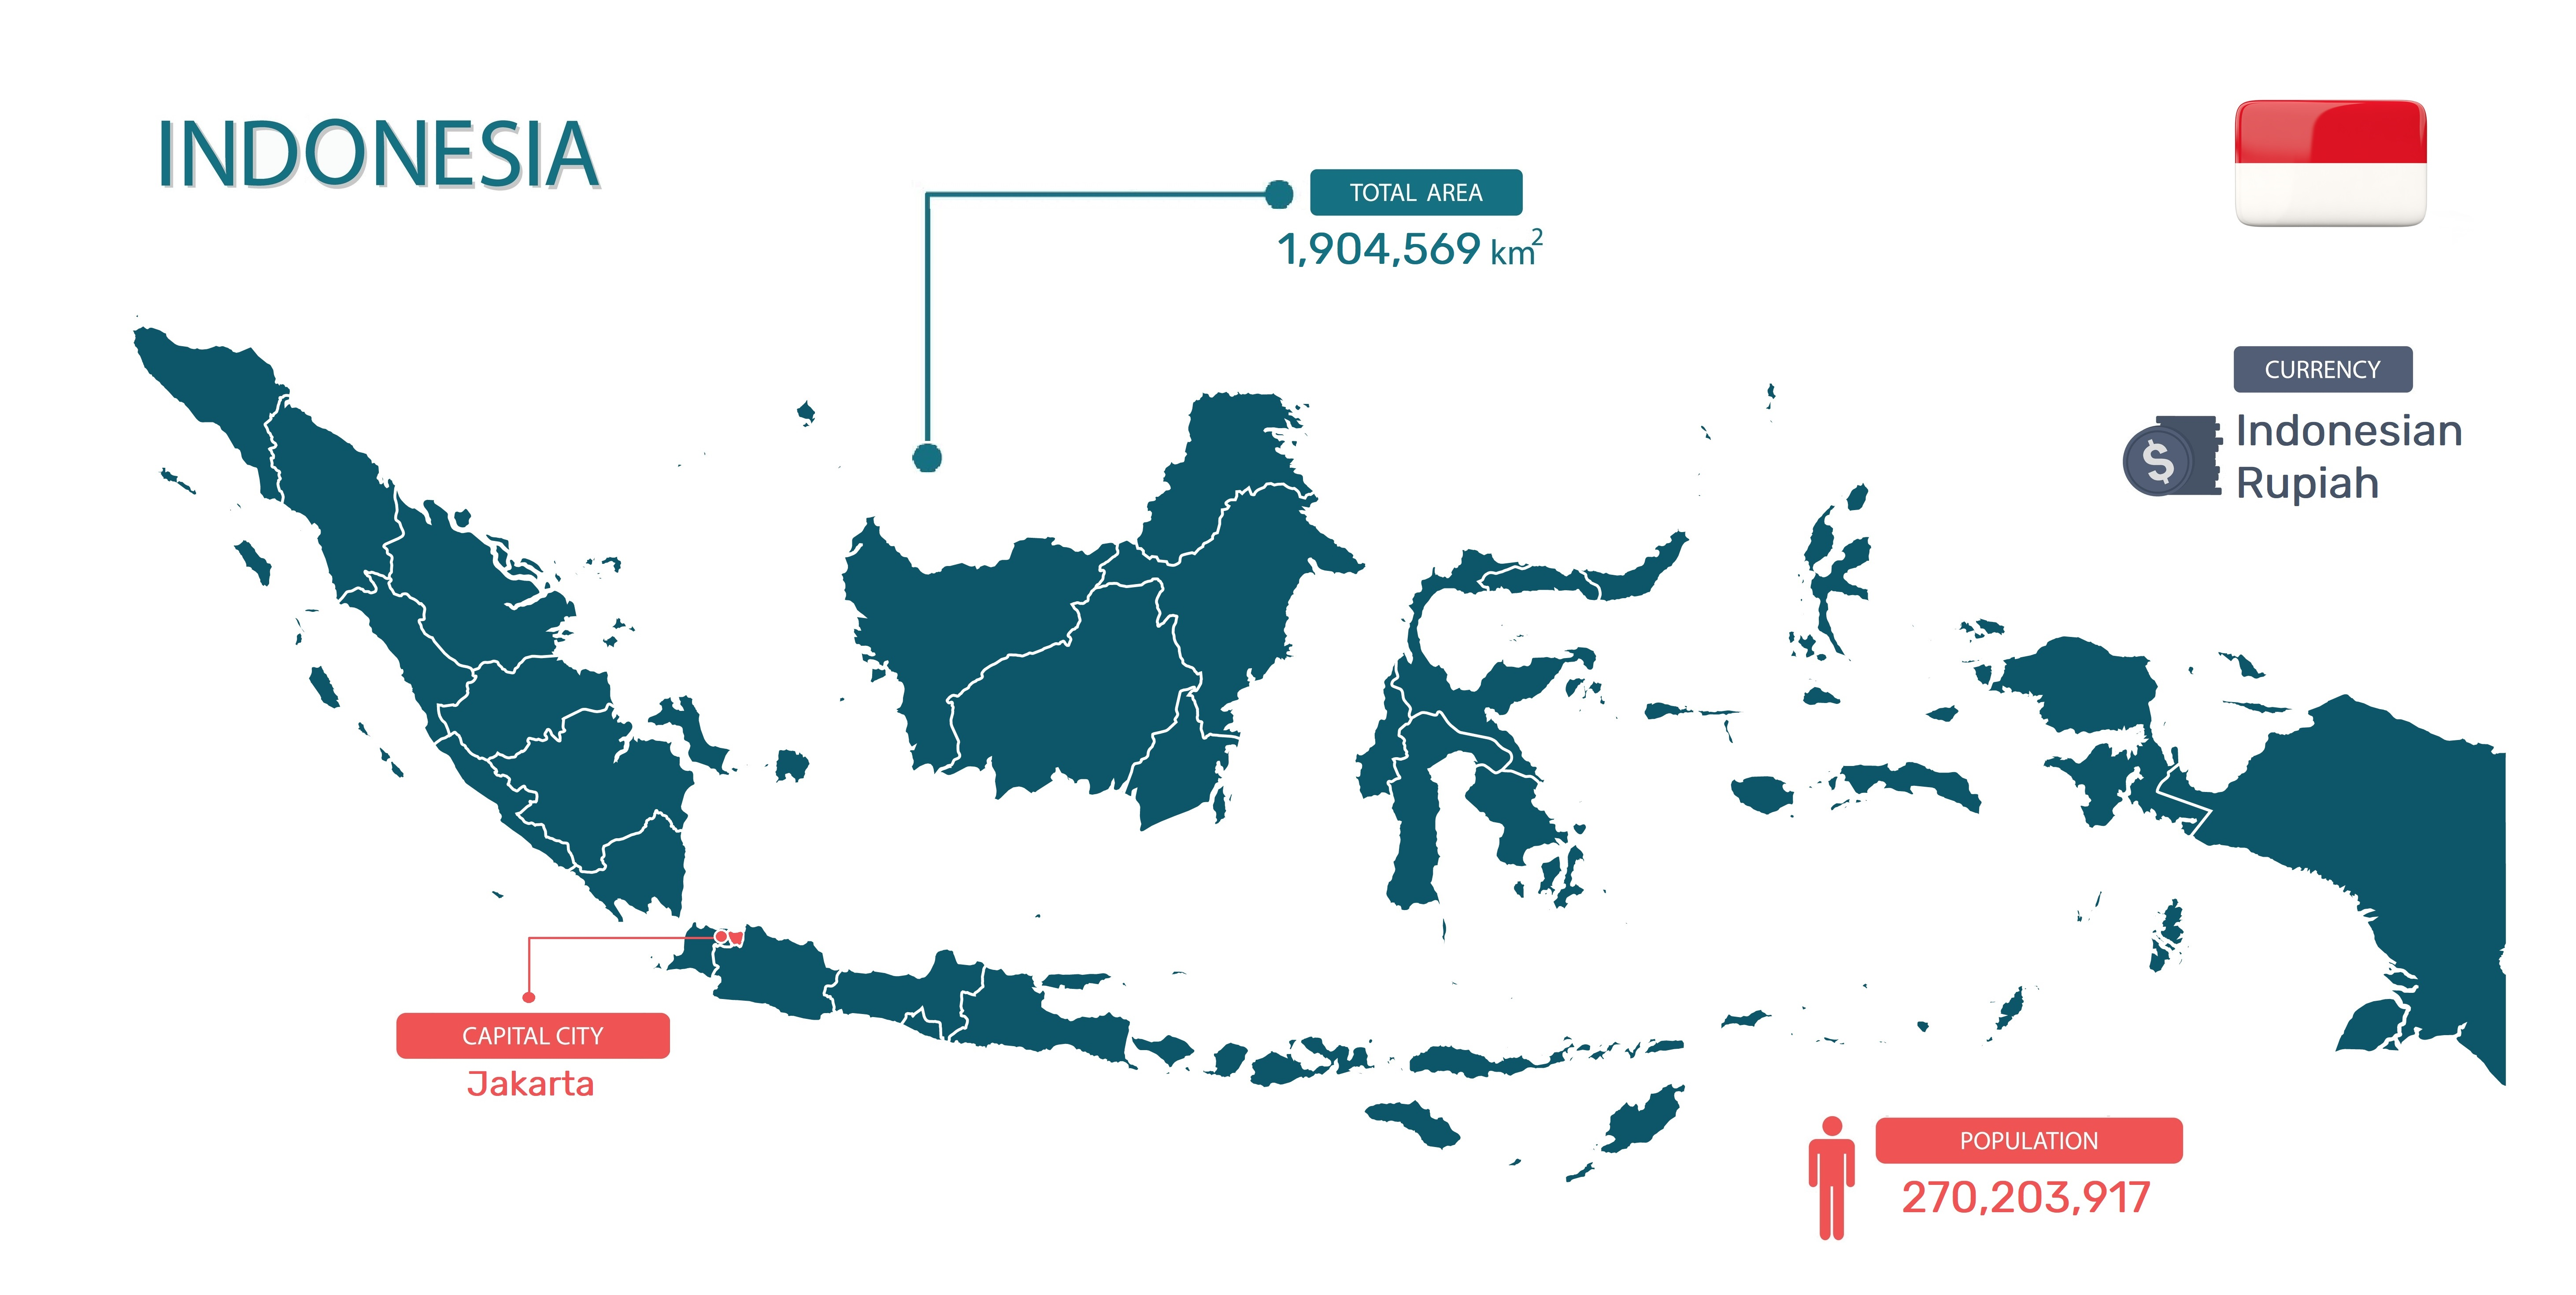

In [9]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='Indonesian Exporters Around the World from 2010 to 2021', 
    sidebar=[pn.pane.Markdown("# Analyzing Indonesian Exporting Manufactures from 2010 to 2021"), 
             pn.pane.Markdown("#### Indonesia is renowned for its abundant natural resources, and commodities played a pivotal role in its exports during this period. The period from 2010 to 2021 witnessed significant changes and developments in Indonesia's export landscape. This analysis delves into the key trends and opportunities that defined Indonesia's export sector during this crucial 12-year span.The analysis reveals a transition towards higher-value exports, particularly with China and the US. The period from 2010 to 2021 marked a dynamic era for Indonesian exports, characterized by substantial growth, diversification of markets, and the transition towards higher-value products. As Indonesia continues to navigate the evolving global trade landscape, it must address ongoing challenges and capitalize on emerging opportunities. The lessons learned from this analysis provide valuable insights into shaping Indonesia's export strategy for the future, ensuring sustainable growth and competitiveness in the global arena."), 
             pn.pane.JPG('c:/Users/Roy/Indonesian Fruits Importer/Indonesia.jpg', sizing_mode='scale_both')
            ],
    main=[pn.Row(pn.Column(fig2.panel(height = 850)))
          ],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable()